<a href="https://colab.research.google.com/github/sagarrokad1/LGMVIP-DataScience/blob/main/TASK-8%20Advance%20Level/LGM_VIP_October_2021_TASK_8_Next_Word_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

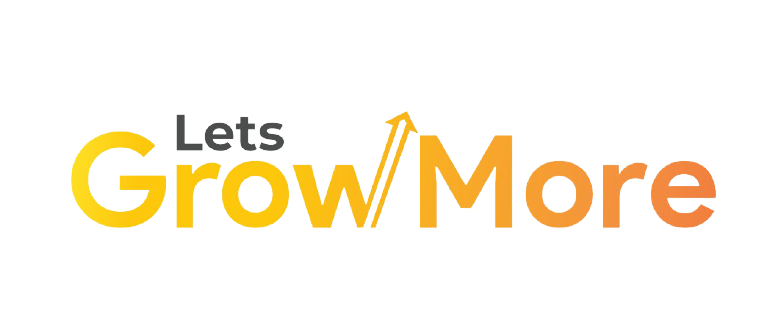


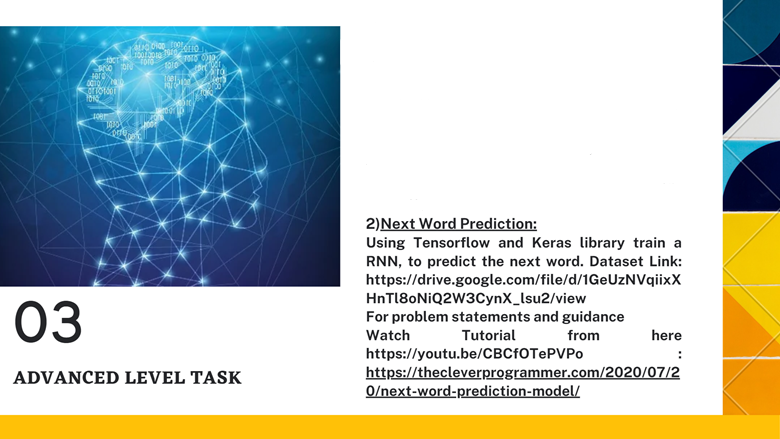


###**Problem Statement:**
Using Tensorflow and Keras library train a RNN, to predict the next word.

##**BY : Sagar Rokad**

##### Importing The Required Libraries:

In [ ]:
#Importing various libaraies required for the project
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
#Uploading the provided dataset 
file = open("/content/drive/MyDrive/data's sem 3/1661-0.txt", "r", encoding = "utf8")
file.read()

'\ufeff\nProject Gutenberg\'s The Adventures of Sherlock Holmes, by Arthur Conan Doyle\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: The Adventures of Sherlock Holmes\n\nAuthor: Arthur Conan Doyle\n\nRelease Date: November 29, 2002 [EBook #1661]\nLast Updated: May 20, 2019\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***\n\n\n\nProduced by an anonymous Project Gutenberg volunteer and Jose Menendez\n\n\n\ncover\n\n\n\nThe Adventures of Sherlock Holmes\n\n\n\nby Arthur Conan Doyle\n\n\n\nContents\n\n\n   I.     A Scandal in Bohemia\n   II.    The Red-Headed League\n   III.   A Case of Identity\n   IV.    The Boscombe Valley Mystery\n   V.     The Five Orange Pips\n   VI.    The Man wi

In [ ]:
lines = []
file.seek(0)
for i in file:
    lines.append(i)
    
print("The First Line: ", lines[1])
print("The Last Line: ", lines[-6])

The First Line:  Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle

The Last Line:  subscribe to our email newsletter to hear about new eBooks.



In [ ]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

" Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net   Title: The Adventures of Sherl"

In [ ]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

' Project Gutenberg s The Adventures of Sherlock Holmes  by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever   You may copy it  give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg net   Title  The Adventures of Sherlock Holmes  Author  Arthur Conan Doyle  Release Date  November 29  2002  EBook  1661  Last Updated  May 20  2019  Language  English  Charact'

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use anyone anywhere at no cost and with almost restrictions whatsoever. You may copy it, give it away or re-use under terms Gutenberg License included this online www.gutenberg.net Title: Holmes Author: Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set encoding: UTF-8 *** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES SHERLOCK HOLMES Prod"

### Tokenization:

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[838, 3083, 56, 322, 57, 1523, 15, 95, 839, 3084]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8931


In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  17678


array([[ 838, 3083],
       [3083,   56],
       [  56,  322],
       [ 322,   57],
       [  57, 1523],
       [1523,   15],
       [  15,   95],
       [  95,  839],
       [ 839, 3084],
       [3084, 3085]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 838 3083   56  322   57]
The responses are:  [3083   56  322   57 1523]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Model:

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             89310     
_________________________________________________________________
lstm (LSTM)                  (None, 1, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 8931)              8939931   
Total params: 22,078,241
Trainable params: 22,078,241
Non-trainable params: 0
_________________________________________________________________


### Plot The Model:

In [ ]:
pip install pydot

In [ ]:
pip install graphviz

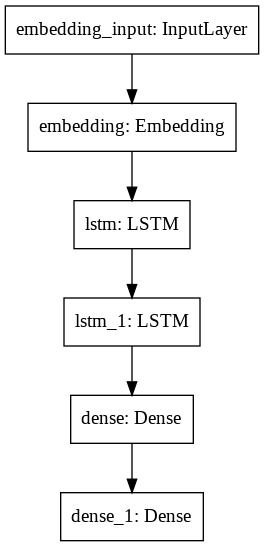

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

### Callbacks:

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Compile The Model:

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Fit The Model:

In [ ]:
import h5py
from keras.preprocessing.sequence import pad_sequences

In [ ]:
history = model.fit(X, y, validation_split=0.05, batch_size=128, epochs=45, shuffle=True).history

Epoch 1/45
132/132 [==============================] - 87s 629ms/step - loss: 8.9117 - accuracy: 0.0812 - val_loss: 9.5465 - val_accuracy: 0.0283
Epoch 2/45
132/132 [==============================] - 67s 511ms/step - loss: 8.3806 - accuracy: 0.0821 - val_loss: 10.0450 - val_accuracy: 0.0283
Epoch 3/45
132/132 [==============================] - 65s 492ms/step - loss: 8.1079 - accuracy: 0.0821 - val_loss: 10.5407 - val_accuracy: 0.0283
Epoch 4/45
132/132 [==============================] - 65s 493ms/step - loss: 7.9711 - accuracy: 0.0821 - val_loss: 11.1749 - val_accuracy: 0.0283
Epoch 5/45
132/132 [==============================] - 65s 492ms/step - loss: 7.8791 - accuracy: 0.0820 - val_loss: 11.5097 - val_accuracy: 0.0249
Epoch 6/45
132/132 [==============================] - 65s 491ms/step - loss: 7.7808 - accuracy: 0.0821 - val_loss: 11.6584 - val_accuracy: 0.0238
Epoch 7/45
132/132 [==============================] - 65s 490ms/step - loss: 7.6789 - accuracy: 0.0824 - val_loss: 11.7993 - 

### Accuracy

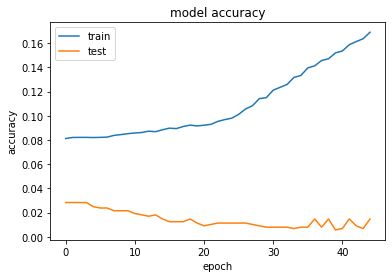

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Loss

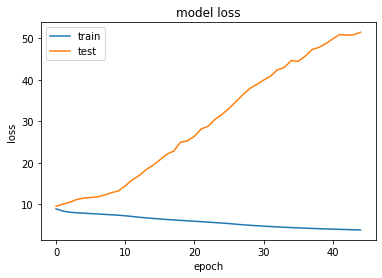

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### save model

In [ ]:
from tensorflow.keras.models import load_model
model.save("model_act.h5")
print("Saved model to disk")
model = load_model('model_act.h5')

Saved model to disk


### result 

In [ ]:
test = ['welcome to',
'more than',
'although this']

for t in test:
    example = tokenizer.texts_to_sequences([t])
    prediction = model.predict(np.array(example))
    predicted_word = np.argmax(prediction)
    reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
    print ("{0} -> {1}".format(t, reverse_word_map[predicted_word]))

welcome to -> pity’s
more than -> needs
although this -> gin
